# GRIP @ THE SPARK FOUNDATION
## Data Science and Business Analytic internship (May 2021)


**Prediction using Supervised ML**
**Task 1- predict the percentage of a student based on the n.o of study hours**
**and What will be predicted score if a student studies for 9.25 hrs/ day?**

**By Mohammed Amjad**

**importing libraries**

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
print("all the libraries are imported succesfully")


all the libraries are imported succesfully


**Reading the data**


In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("Data is imported successfully")

Data is imported successfully


**showing the data set** 

In [7]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [10]:
#checking null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

The above code shown that there is no null values
so,next we can check some information about data

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [14]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [16]:
#know we can check the correlation between variable
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Data Visualisation**


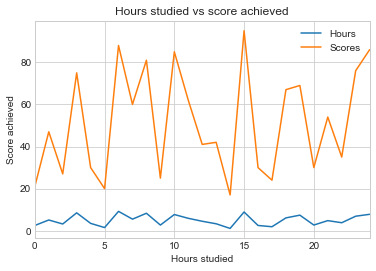

In [20]:
#line plot
plt.style.use("seaborn-whitegrid")
data.plot(kind = "line")
plt.title("Hours studied vs score achieved")
plt.xlabel("Hours studied")
plt.ylabel("Score achieved")
plt.show()

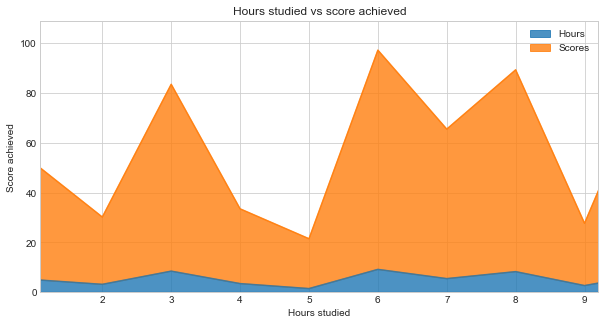

In [21]:
#area plot
xmin=min(data.Hours)
xmax=max(data.Hours)
data.plot(kind='area',alpha=0.8,stacked=True,figsize=(10,5),xlim=(xmin,xmax))
plt.title("Hours studied vs score achieved")
plt.xlabel("Hours studied")
plt.ylabel("Score achieved")
plt.show()

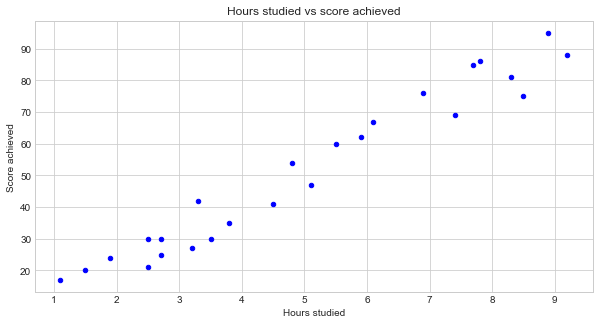

In [23]:
#scatter plot
data.plot(kind='scatter',x='Hours',y='Scores',color='b',figsize=(10,5))
plt.title("Hours studied vs score achieved")
plt.xlabel("Hours studied")
plt.ylabel("Score achieved")
plt.show()

**Splitting the data and training it**

In [26]:
x = np.asanyarray(data[['Hours']])
y = np.asanyarray(data['Scores'])

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=2)
regressor=LinearRegression()
regressor.fit(train_x,train_y)

print ('Coeffiecients:', regressor.coef_)
print ('Intercept:', regressor.intercept_)


Coeffiecients: [9.94061514]
Intercept: 1.5079104828268726


**Next we can make a best fit line for data**

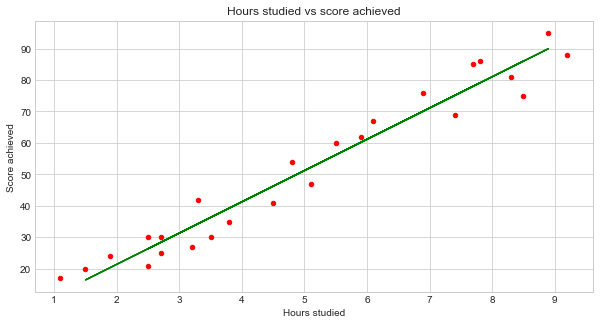

In [32]:
data.plot(kind='scatter',x='Hours',y='Scores',color='r',figsize=(10,5))
plt.plot(train_x,regressor.coef_[0]*train_x+regressor.intercept_,color='g')
plt.title("Hours studied vs score achieved")
plt.xlabel("Hours studied")
plt.ylabel("Score achieved")
plt.show()

In [33]:
#using metrics to find the mean absolute error and r2 to find the accuracy
from sklearn import metrics
from sklearn.metrics import r2_score

y_pred=regressor.predict(test_x)
print('Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_pred, test_y)))
print('Mean Squared Error: {}'.format(metrics.mean_squared_error(y_pred, test_y)))
print("R2-score: %.2f" % r2_score(y_pred, test_y))

Mean Absolute Error: 4.877039354964484
Mean Squared Error: 24.38762033985666
R2-score: 0.98


In [34]:
#comparing actual vs predicted Scores
data2 = pd.DataFrame({'Actual' : test_y, 'Predicted' : y_pred})
data2

,Actual,Predicted
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


**Predicting the percentage score if a student studies for 9.25 hrs/ day**

In [35]:
hours=9.25
predicted_score=regressor.predict([[hours]])

print(f'No. of hours = {hours}')
print(f'predicted Score = {predicted_score[0]}')

No. of hours = 9.25
predicted Score = 93.45860055685799
